In [251]:
from __future__ import print_function
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf

from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


In [265]:
! ls

aa.ipynb    equipment-success.ipynb		mlcc-exercises
demo.ipynb  equipment_success_201810121529.csv	mlcc-exercises_en.zip


In [270]:
equipment_success_dataframe = pd.read_csv("./equipment_success.csv", sep=",")
equipment_success_dataframe.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start
count,252940.0,252940.0,252940.0,203853.0,252940.0,252940.0,214851.0,252940.0,252940.0,252940.0,200171.0
mean,174079.2,426.2,21.8,57.0,54.4,41.0,35.0,37.5,30.4,652416.5,831.0
std,63641.3,413.7,27.7,21.3,29.2,28.2,9.9,10.9,11.5,73017.6,228.0
min,51.0,2.0,0.0,-10.0,-10.0,-10.0,-1.2,-10.0,-10.0,525947.0,0.0
25%,138502.0,57.0,1.0,42.5,42.1,23.8,28.8,30.7,23.3,589181.8,759.0
50%,176129.0,240.0,10.0,52.5,56.2,37.5,33.8,36.0,30.0,652416.5,878.0
75%,222135.0,828.0,34.0,66.2,70.0,55.0,39.0,42.5,36.2,715651.2,966.0
max,288723.0,1390.0,215.0,125.0,126.0,125.0,120.0,120.0,117.5,778886.0,1559.0


In [425]:
equipment_success_dataframe['valid'] = (equipment_success_dataframe['average_loss'].apply(lambda x : not math.isnan(x) and x > 20 and x < 90) & 
                                       equipment_success_dataframe['eq_average_loss'].apply(lambda x : not math.isnan(x)) &
                                       equipment_success_dataframe['high_loss'].apply(lambda x : not math.isnan(x)) &
                                       equipment_success_dataframe['low_loss'].apply(lambda x : not math.isnan(x)) &
                                       equipment_success_dataframe['months_since_equipped'].apply(lambda x : x < 24) &
                                       equipment_success_dataframe['age_in_months_at_equipped_start'].apply(lambda x : not math.isnan(x) and x < 12*90 and x > 12*20))

In [426]:
equipment_success_dataframe['age'] = equipment_success_dataframe['age_in_months_at_equipped_start']/12

In [427]:
equipment_success = equipment_success_dataframe.query('valid == True and center_id == 29').copy()
equipment_success

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,gender,age,valid
35653,75203,29,L,9,66.2,69.0,60.0,28.8,31.0,17.5,676621,943.0,NaN,78.6,True
35704,147895,29,L,0,48.8,57.5,30.0,45.0,51.7,31.2,676672,807.0,male,67.2,True
35705,147895,29,L,0,48.8,57.5,30.0,32.5,36.7,25.0,676673,807.0,male,67.2,True
35806,147895,29,L,1,48.8,57.5,30.0,31.2,33.3,25.0,676674,807.0,male,67.2,True
35807,147895,29,L,5,48.8,57.5,30.0,33.8,34.0,28.8,676675,807.0,male,67.2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176523,87362,29,R,13,61.2,67.9,50.0,37.5,43.3,31.2,726693,980.0,female,81.7,True
176524,87362,29,R,23,61.2,67.9,50.0,35.0,43.3,27.5,726694,980.0,female,81.7,True
176526,224342,29,R,9,65.0,66.2,63.3,28.8,32.0,25.0,726696,981.0,male,81.8,True
176701,131892,29,L,4,53.8,56.7,51.2,30.0,35.0,26.2,726767,473.0,male,39.4,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd28f83c908>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd28ff09ac8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd28ff17438>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd312958cf8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd31296c588>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3129ade80>]],
      dtype=object)

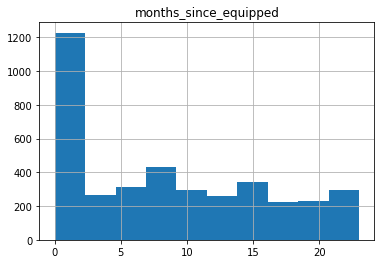

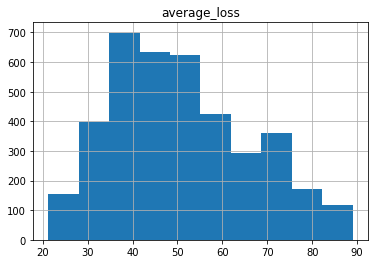

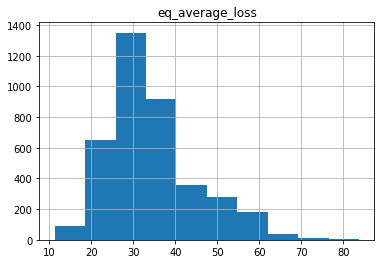

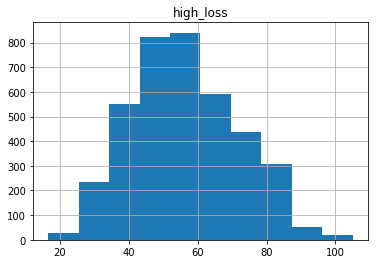

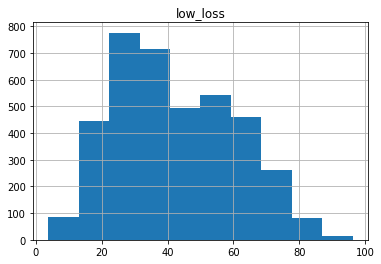

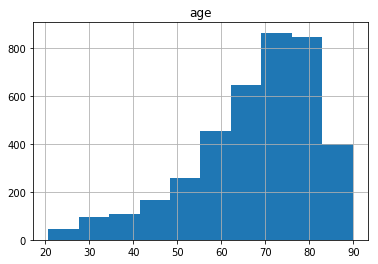

In [428]:
for feature in ['months_since_equipped', 'average_loss', 'eq_average_loss', 'high_loss', 'low_loss', 'age']:
    display.display(equipment_success.hist(feature))

In [370]:
equipment_success.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,age
count,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0
mean,144322.4,29.0,8.5,50.9,56.1,42.2,34.2,36.4,29.8,701671.7,810.3,67.5
std,43718.4,0.0,7.3,15.3,15.3,18.2,10.5,11.0,11.5,14180.1,167.7,14.0
min,4115.0,29.0,0.0,21.2,16.7,3.8,11.2,10.0,0.0,676621.0,248.0,20.7
25%,120908.0,29.0,1.0,38.8,45.0,27.5,27.5,28.4,21.2,689300.2,721.0,60.1
50%,136752.0,29.0,7.0,48.8,55.0,40.0,32.5,35.0,27.5,701972.0,843.0,70.2
75%,168240.0,29.0,14.0,61.2,66.7,56.0,40.0,42.5,36.2,713628.8,936.0,78.0
max,288188.0,29.0,23.0,89.0,105.0,96.2,83.8,85.0,85.0,726788.0,1078.0,89.8


In [387]:
def scaleInner(df, feature):
    stats = df[feature].describe();
    std = stats['std']
    mean = stats['mean']
    df[feature + '_scaled'] = (df[feature] - mean)/std
    return df

def scale(df, features):
    scaledDf = df.copy()
    for feature in features:
        scaleInner(scaledDf, feature)
    return scaledDf        

In [393]:
def preprocess_features(df):
  """Prepares input features from a data set.

  Args:
    df: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """

    
  selected_features = scale(df, ['months_since_equipped', 'average_loss', 'high_loss', 'low_loss', 'age_in_months_at_equipped_start'])



  #processed_features["buck_average_loss"] = bucketized_average_loss
  #processed_features['x1'] = processed_features['average_loss'] * processed_features['high_loss']
  #processed_features['x2'] = processed_features['average_loss'] * processed_features['low_loss']
  #processed_features['x3'] = processed_features['high_loss'] * processed_features['low_loss']
  #processed_features['x4'] = processed_features['average_loss'] * processed_features['months_since_equipped']
  #processed_features['x5'] = processed_features['average_loss'] * processed_features['age_in_months_at_equipped_start']
  #processed_features['x6'] = processed_features['average_loss'] ** 2
  #processed_features['x7'] = processed_features['months_since_equipped'] ** 2
  #processed_features['x8'] = processed_features['age_in_months_at_equipped_start'] ** 2
  
  return selected_features

def preprocess_targets(df):
  """Prepares target features (i.e., labels) from a data set.

  Args:
    df: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  #output_targets['eq_average_loss'] = df['eq_average_loss'] 
  #output_targets['distance_from_target'] = ((df['eq_average_loss'] - df['average_loss']/2))
  output_targets['target_reached'] = (df['eq_average_loss'] < df['average_loss']/2).astype('float')
    

  #output_targets['distance_from_target'] = ((df['eq_average_loss'] - df['average_loss']/2).apply (lambda x : max(x,0)))

  return output_targets

In [411]:
equipment_success = equipment_success.sample(frac=1)
equipment_success.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,age
count,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0,3878.0
mean,144322.4,29.0,8.5,50.9,56.1,42.2,34.2,36.4,29.8,701671.7,810.3,67.5
std,43718.4,0.0,7.3,15.3,15.3,18.2,10.5,11.0,11.5,14180.1,167.7,14.0
min,4115.0,29.0,0.0,21.2,16.7,3.8,11.2,10.0,0.0,676621.0,248.0,20.7
25%,120908.0,29.0,1.0,38.8,45.0,27.5,27.5,28.4,21.2,689300.2,721.0,60.1
50%,136752.0,29.0,7.0,48.8,55.0,40.0,32.5,35.0,27.5,701972.0,843.0,70.2
75%,168240.0,29.0,14.0,61.2,66.7,56.0,40.0,42.5,36.2,713628.8,936.0,78.0
max,288188.0,29.0,23.0,89.0,105.0,96.2,83.8,85.0,85.0,726788.0,1078.0,89.8


In [412]:
total_samples = math.floor(equipment_success.count()['ears'])
examples = preprocess_features(equipment_success)
targets = preprocess_targets(equipment_success)

training_test_ratio = 0.8
training_samples = math.floor(total_samples*0.8)
validation_samples = total_samples - training_samples

[training_samples, validation_samples]

[3102, 776]

In [429]:
examples

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,gender,age,valid,months_since_equipped_scaled,average_loss_scaled,high_loss_scaled,low_loss_scaled,age_in_months_at_equipped_start_scaled
79210,172896,29,L,5,37.5,43.3,17.5,36.2,41.0,18.8,691004,939.0,female,78.2,True,-0.5,-0.9,-0.8,-1.4,0.8
39182,227372,29,BIN,3,35.0,37.5,27.5,51.2,49.0,48.8,677773,417.0,female,34.8,True,-0.8,-1.0,-1.2,-0.8,-2.3
144376,120931,29,R,15,48.8,47.0,45.0,31.2,24.0,32.5,715244,639.0,male,53.2,True,0.9,-0.1,-0.6,0.2,-1.0
52195,143549,29,BIN,16,28.8,35.0,17.5,32.5,42.5,17.5,682287,922.0,female,76.8,True,1.0,-1.4,-1.4,-1.4,0.7
79765,143563,29,R,1,57.5,65.0,48.3,41.2,46.7,37.5,691189,1006.0,female,83.8,True,-1.0,0.4,0.6,0.3,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97951,231374,29,R,9,81.2,85.0,70.0,38.8,40.0,38.3,698273,738.0,NaN,61.5,True,0.1,2.0,1.9,1.5,-0.4
88937,155381,29,BIN,12,36.2,46.7,18.8,23.8,26.7,18.3,695169,709.0,female,59.1,True,0.5,-1.0,-0.6,-1.3,-0.6
134289,108150,29,BIN,3,60.0,62.0,57.5,38.8,40.0,32.5,711352,836.0,NaN,69.7,True,-0.8,0.6,0.4,0.8,0.2
83997,108404,29,BIN,20,43.8,43.6,32.5,41.2,45.0,33.8,692892,712.0,NaN,59.3,True,1.6,-0.5,-0.8,-0.5,-0.6


In [414]:
targets.describe()

,target_reached
count,3878.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [416]:
training_examples = examples.head(training_samples).copy()

In [417]:
validation_examples = examples.tail(validation_samples).copy()

In [418]:
training_targets = targets.head(training_samples)

In [419]:
validation_targets = targets.tail(validation_samples)

In [420]:
training_targets.describe()

,target_reached
count,3102.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [404]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of multiple features.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [434]:
def construct_feature_columns():
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  deafness_levels = [20, 40, 55, 70, 80, 90]
  months_since_equipped = tf.feature_column.numeric_column("months_since_equipped")
  age_in_months_at_equipped_start = tf.feature_column.numeric_column("age_in_months_at_equipped_start")


  average_loss = tf.feature_column.numeric_column("average_loss")
  bucketized_average_loss = tf.feature_column.bucketized_column(
    average_loss, boundaries=deafness_levels)

  high_loss = tf.feature_column.numeric_column("high_loss")
  bucketized_high_loss = tf.feature_column.bucketized_column(
    high_loss, boundaries=deafness_levels)

  low_loss = tf.feature_column.numeric_column("low_loss")
  bucketized_low_loss = tf.feature_column.bucketized_column(
    low_loss, boundaries=deafness_levels)

  average_x_high_x_low = tf.feature_column.crossed_column(set([bucketized_average_loss, bucketized_high_loss, bucketized_low_loss]), hash_bucket_size=1000) 
  
  return set([average_loss, high_loss, low_loss, average_x_high_x_low, months_since_equipped, age_in_months_at_equipped_start])

In [431]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    label,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model of multiple features.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearRegressor` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear regressor object.
  #my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate)
 # my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets[label], 
      batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets[label], 
      num_epochs=1, 
      shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(
      validation_examples, validation_targets[label], 
      num_epochs=1, 
      shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor, training_predictions, training_targets[label]

In [432]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    label,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  #my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  
  linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets[label], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets[label], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets[label], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return linear_classifier

In [409]:
linear_regressor, predictions, targets = train_model(
    learning_rate=1.5,
    steps=300,
    batch_size=100,
    label='eq_average_loss',
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Training model...
RMSE (on training data):


KeyError: 'eq_average_loss'

In [435]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.005,
    steps=300,
    batch_size=100,
    label='target_reached',
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Training model...
LogLoss (on training data):


TypeError: Expected binary or unicode string, got nan

In [360]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["target_reached"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])
evaluation_metrics

AUC on the validation set: 0.89
Accuracy on the validation set: 0.86


{'accuracy': 0.8646907,
 'accuracy_baseline': 0.8298969,
 'auc': 0.88919866,
 'auc_precision_recall': 0.5994042,
 'average_loss': 0.29714757,
 'global_step': 300,
 'label/mean': 0.17010309,
 'loss': 0.29714757,
 'precision': 0.69014084,
 'prediction/mean': 0.15690045,
 'recall': 0.37121212}

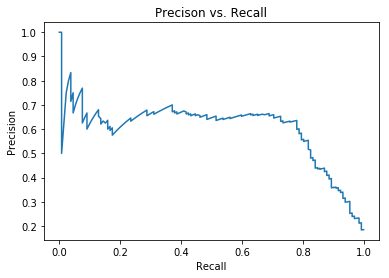

In [361]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

precision, recall, thresholds = metrics.precision_recall_curve(
    validation_targets, validation_probabilities)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precison vs. Recall")
_ = plt.show()

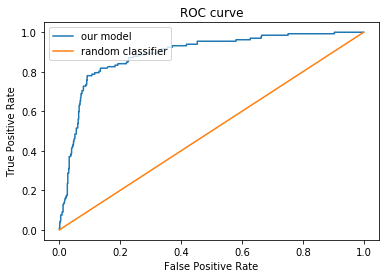

In [362]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
_ = plt.legend(loc=2)

In [309]:
 predict_training_input_fn = lambda: my_input_fn(
  training_examples, 
  training_targets['eq_average_loss'], 
  num_epochs=1, 
  shuffle=False)
    
training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
training_predictions = np.array([item['predictions'][0] for item in training_predictions])

training_predictions

array([15.81773 , 14.687185, 12.250897, ..., 10.229536, 12.71915 ,
       10.665826], dtype=float32)

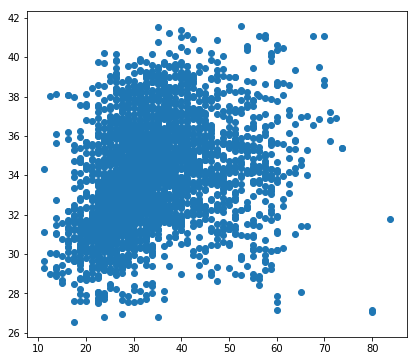

In [331]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(targets, predictions )

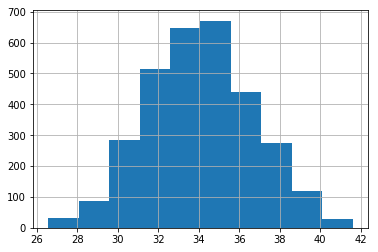

In [332]:
pd.DataFrame({'x': predictions})['x'].hist()

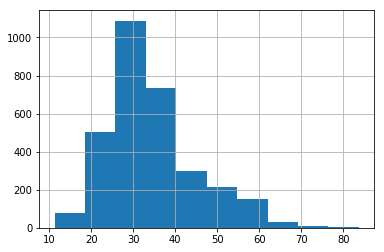

In [333]:
pd.DataFrame({'x': targets})['x'].hist()

In [334]:
pd.DataFrame({'x': (targets - predictions).apply (lambda x: abs(x))})['x'].describe()

count   3102.0
mean       7.6
std        6.7
min        0.0
25%        2.7
50%        5.9
75%       10.3
max       53.0
Name: x, dtype: float64

In [338]:
pd.DataFrame({'x': (targets - 34.4).apply (lambda x: abs(x))})['x'].describe()

count   3102.0
mean       8.1
std        6.7
min        0.4
25%        3.1
50%        6.9
75%       11.9
max       49.4
Name: x, dtype: float64

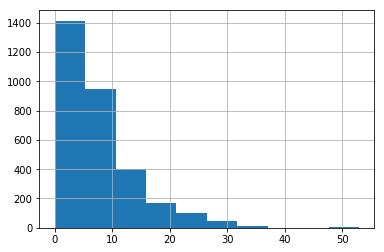

In [335]:
pd.DataFrame({'x': (targets - predictions).apply (lambda x: abs(x))})['x'].hist()

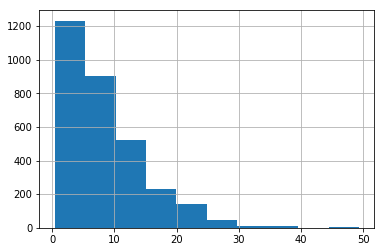

In [337]:
pd.DataFrame({'x': (targets - 34.4).apply (lambda x: abs(x))})['x'].hist()